<a href="https://colab.research.google.com/github/LarissaHa/nlp-experiments/blob/master/gendersternchen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loading packages and defining input text

In [1]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
#!pip install --upgrade spacy
import spacy
!python -m spacy download de_core_news_sm

     |████████████████████████████████| 14.9MB 638kB/s 
  Created wheel for de-core-news-sm: filename=de_core_news_sm-2.2.5-cp36-none-any.whl size=14907056 sha256=641858e1ebf9a43c582461e0576e67c019e2989256242386cdf676f23aeee33a
  Stored in directory: /tmp/pip-ephem-wheel-cache-pbk7420v/wheels/ba/3f/ed/d4aa8e45e7191b7f32db4bfad565e7da1edbf05c916ca7a1ca
Successfully built de-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('de_core_news_sm')


In [4]:
nlp = spacy.load("de_core_news_sm")

OSError: ignored

In [0]:
text = "Autor:innen und Autor_innen, AutorInnen und Autor/innen, Autor*innen und Autorinnen"
pronomen = "jede*r, jede:r, jede_r, jede/r, eine*r, eine:r, eine_r, eine/r"

# out-of-the-box tokenization

## für Nomen

In [0]:
doc = nlp(text)

In [0]:
lemmas = []
for token in doc:
  if token.is_punct is False and token.is_stop is False:
    print(token.lemma_)
    lemmas.append(token.lemma_)

Autor
innen
Autor_innen
AutorInnen
Autor/innen
Autor*innen
Autorin


In [0]:
words = nltk.tokenize.word_tokenize(text)
for token in words:
  print(token)

Autor
:
innen
und
Autor_innen
,
AutorInnen
und
Autor/innen
,
Autor*innen
und
Autorinnen


In [0]:
import string

In [0]:
table = str.maketrans(' ', ' ', string.punctuation)
stripped = [w.translate(table).strip() for w in words]
for i in stripped:
  print(i)

Autor

innen
und
Autorinnen

AutorInnen
und
Autorinnen

Autorinnen
und
Autorinnen


## für Pronomen

In [0]:
print(pronomen)

jede*r, jede:r, jede_r, jede/r, eine*r, eine:r, eine_r, eine/r


In [0]:
pro = nlp(pronomen)

In [0]:
for token in pro:
  if token.is_punct is False:
    print(token.text)

jede*r
jede
r
jede_r
jede/r
eine*r
eine
r
eine_r
eine/r


In [0]:
!pip install fasttext

In [0]:
import fasttext.util
fasttext.util.download_model('de', if_exists='ignore')
ft = fasttext.load_model('cc.de.300.bin')

In [0]:
vectors = [ft.get_word_vector(w) for w in lemmas]

In [0]:
from sklearn.manifold import TSNE
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
def display_embeddings(vectors, labels):
  tsne = TSNE(n_components=2, random_state=0)
  np.set_printoptions(suppress=True)
  Y = tsne.fit_transform(vectors)

  x_coords = Y[:, 0]
  y_coords = Y[:, 1]
  # display scatter plot
  plt.scatter(x_coords, y_coords)
  for label, x, y in zip(labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
  plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
  plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
  plt.show()

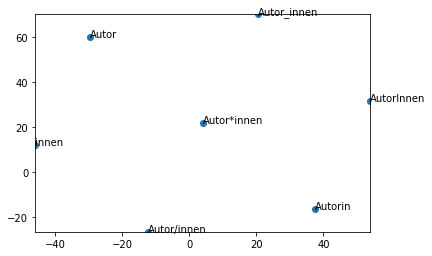

In [0]:
display_embeddings(vectors, lemmas)